## Task 10 CART

https://shimo.im/docs/rgsFiiccsQI4ptDB/read 接[Task 8](https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/Task%208.ipynb)




**Classification And Regression Tree, CART**, 同样由特征选择、树的生成与剪枝构成, 同样也是基于特征条件下构造输出变量的条件概率分布的方法。其假设为**二叉树**，即等价的递归二分每个特征值。

### CART 生成，尽可能的大

> 最小二乘回归树：回归树采用平方误差最小化准则
- 对于每个切分变量，首先二分确定最优的切分点；然后遍历所选择最优的切分变量

<img src='https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/A5_5.png?raw=true' width=500 align='center'>


> 分类树生成：用基尼指数最小化准则，基尼指数表示$Gini(D)$集合的不确定性，$Gini(D,a)$是在某个特征分割后的不确定性。并且值越大越不确定，与熵类似。
- 概率分布的基尼指数: 对于二分类基尼指数为$Gini(p)=2p(1-p)$
$$Gini(p)=\sum_{k=1}^{|Y|}\sum_{k‘\neq k} p_k p_k’=1-\sum_{k=1}^{|Y|}p_k^2$$
- 样本的基尼指数:, $C_k$为D的划分
$$Gini(D)= 1- \sum_{k=1}^{|Y|} (\frac{|C_k|}{|D|})^2$$
- 集合的基尼指数: 其中a将D分割为$D^v$,当二分时下面$V=2$即可。
$$Gini\_index(D,a)=\sum_{v=1}^V \frac{|D^v|}{|D|} Gini(D^v)$$

<img src='https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/A5_6_1.png?raw=true' width=500 align='center'>

<img src='https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/A5_6_2.png?raw=true' width=500 align='center'>


### CART 剪枝，选择最优

> 从决策树$T_0$底端开始剪枝，形成子树序列${T_0,T_1,\dots,T_n}$,直至根节点；

给定参数$\alpha\geq 0$(拟合程度与模型复杂度的调和), 存在唯一的最优子树$T_\alpha$满足下损失最小：

$$C_\alpha(T) = C(T) + \alpha |T|$$

当$\alpha$越大时，$T_\alpha$越小；反之；当$\alpha=0$,则整体最优；当$\alpha=\inf$,根节点最优。

<img src='https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/P5.png?raw=true' width=500 align='center'>

从$T_0$开始，其内部任意节点$t$
- 若其为单节点树，则损失 $C_\alpha(t)=C(t)+\alpha$,
- 以其为根节点的子树损失:$C_\alpha(T_\alpha) = C(T_t)+\alpha |T_t|$
- 容易知道$\alpha=0$或很小时，必有$C_\alpha(T_t)\leq C_\alpha(t)$,则$\alpha=\frac{C(t)-C(T_t)}{|T_t|-1}:=g(t)$时,损失相等，此时$t$节点少，更可取。
- 计算所有的$g(t)$,并减去最小的$T_t$,修剪后的记为$T_1$,同时$\alpha_1=g(t)$,则$T_1$是$[\alpha_1,\alpha_2)$的最优子树。



> 在独立的验证数据集中交叉验证子树序列，选择最优; 平方误差或者基尼指数最小对应的即为最优决策树，并且由每棵树对应一个调和参数，则其一起被确定。

<img src='https://github.com/ZRChao/Book-reading/blob/master/李宏毅机器学习/figures/A5_7.png?raw=true' width=500 align='center'>


### 实例

[Text(170.9,205.737,'X[3] <= 0.8\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(144.608,168.33,'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(197.192,168.33,'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(105.169,130.923,'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(52.5846,93.5167,'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(26.2923,56.11,'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(78.8769,56.11,'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(157.754,93.5167,'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(131.462,56.11,'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(184.046,56.11,'X[2] <= 5.45\nentropy = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(157.754,18.7033,'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(210.338,18.7033,'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(289.215,130.923,'X[2] <= 4.85\ne

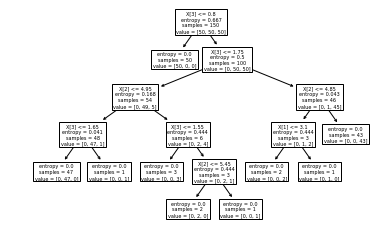

In [19]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

tree.plot_tree(clf.fit(iris.data, iris.target)) 

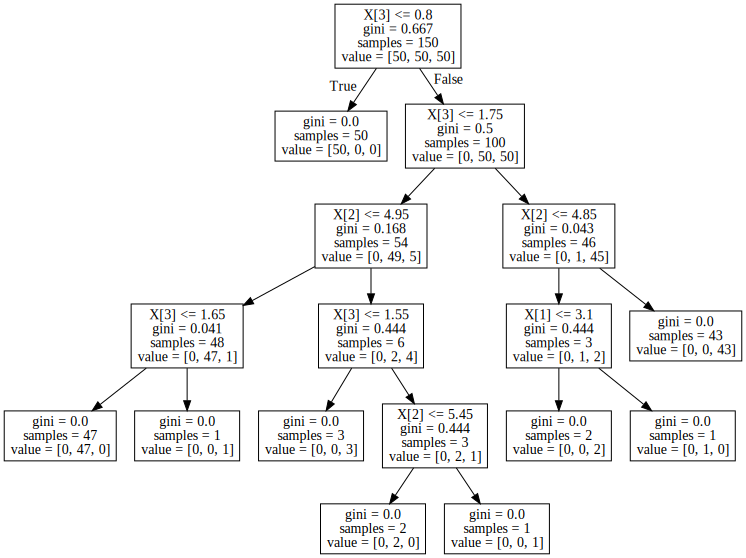

In [20]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph 
#graph.render("iris") 

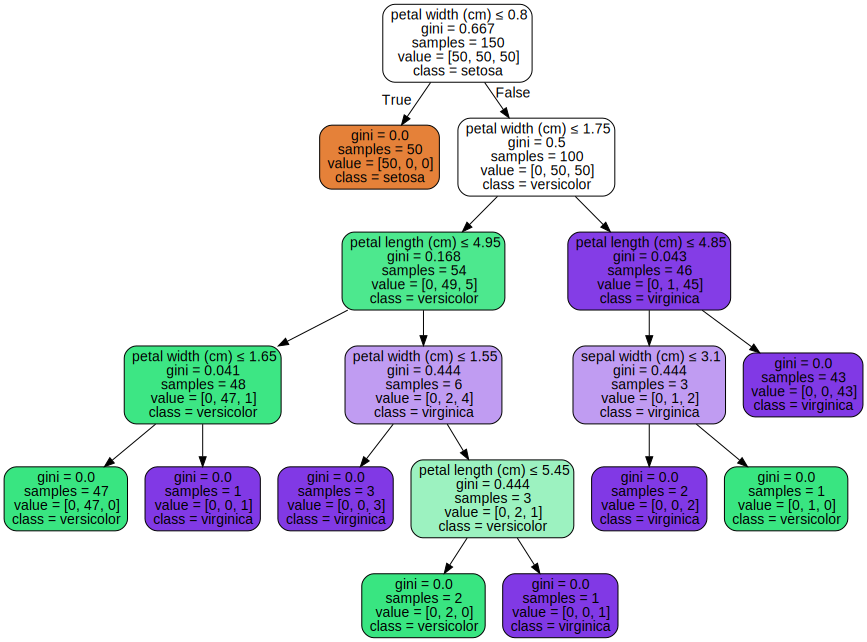

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

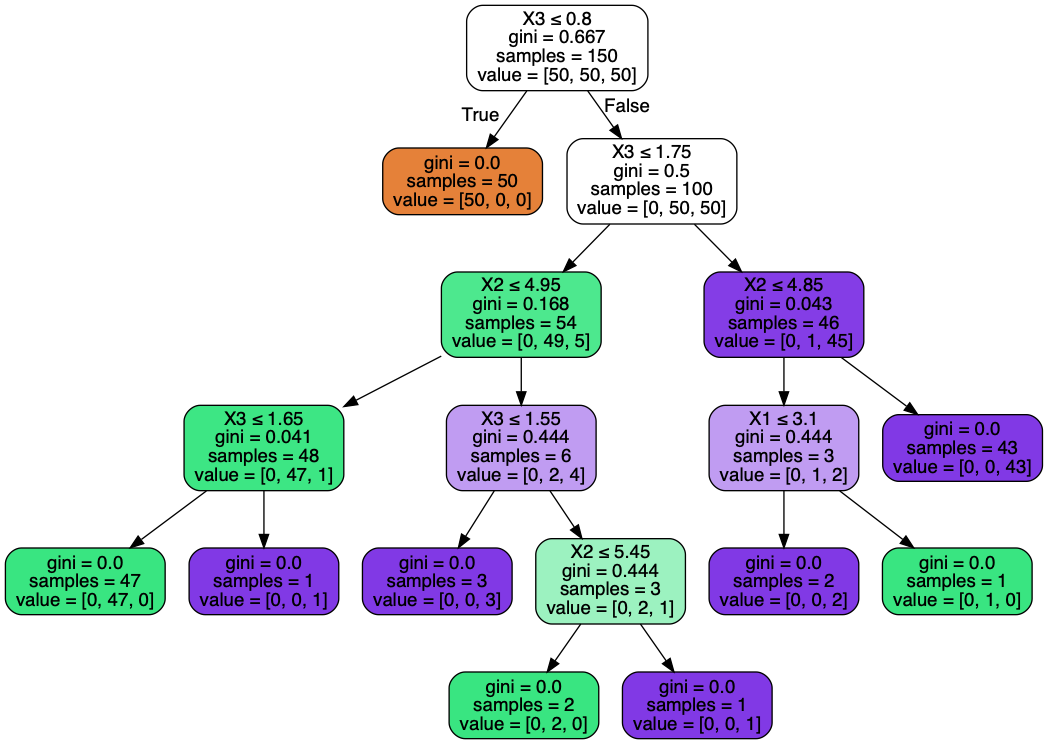

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
str_tree = export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
display(graph)
# graph.create_png()
Image(graph.create_png())